<a href="https://colab.research.google.com/github/Dawon00/Deep_Learning_Seminar/blob/master/linear_regression_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
path = '/content/drive/MyDrive/data-03-diabetes.csv'

import numpy as np

diabetes = np.loadtxt(path, delimiter=',', dtype = np.float32)

diabetes.shape

(759, 9)

In [12]:
label = [i[-1] for i in diabetes]
data = [j[:-1] for j in diabetes]

data[0], label[0]

(array([-0.294118  ,  0.487437  ,  0.180328  , -0.292929  ,  0.        ,
         0.00149028, -0.53117   , -0.0333333 ], dtype=float32), 0.0)

In [23]:
from sklearn.datasets import load_diabetes

# 데이터 가져오기
x = load_diabetes().data[:, 3]
y = load_diabetes().target

data.shape, target.shape


((442,), (442,))

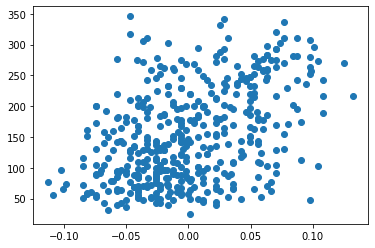

In [21]:
import matplotlib.pyplot as plt

plt.scatter(data, target)
plt.show()

In [22]:
w = 1.0
b = 1.0


In [25]:
y_hat = x[0] * w + b
print(y_hat)#예측한 값
print(y[0])#w 변경 전

1.0218723549949558
151.0


In [26]:
w_inc = w + 0.1 #1.1
y_hat_inc = w_inc * x[0] +b
print(y_hat_inc)#w 변경후

1.0240595904944514


In [27]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w) #w의 증가량
w_rate

0.02187235499495619

In [29]:
w_new = w + w_rate
w_new

1.0218723549949562

In [31]:
b_inc = b + 0.1 #b가 0.1만큼 증가할때 얼마나 증가하나?
y_hat_inc = w *x[0] + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
b_rate #1

1.1218723549949559


1.0

In [32]:
b_new = b + 1
b_new

2.0

In [35]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + err
print(w_new, b_new)

4.2803748493304035 150.97812764500503


In [38]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_new = w + w_rate * err
b_new = b + err
print(w_new, b_new)

4.277530296852364 150.84807523507044


In [46]:
for x_i, y_i in zip(x,y):
  y_hat = x_i * w_new + b_new #예측 값 만들기
  err = y_i - y_hat #예측값과 실제값의 차이를 저장
  w_rate = x_i #새로운 x
  w_new = w_new + w_rate * err #w를 업데이트하기
  b_new = b_new + err
print(w_new, b_new)

560.669411443362 101.8676408467141


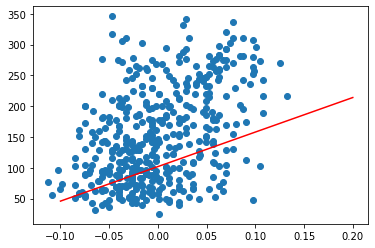

In [48]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w_new + b_new)
pt2 = (0.2, 0.2 * w_new + b_new)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r-')
plt.show()

In [53]:
# 경사하강법 적용
class Neuron:
  def __init__(self):
    self.w = 1.0
    self.b = 1.0
  
  def linear(self, x):
    y_hat = x * self.w + self.b
    return y_hat
  
  def backpropagation(self, x, err):
    w_grad = w * err #변화율
    b_grad = err
    return w_grad, b_grad

  def fit(self, x, y, epochs = 100): #반복 횟수
    for i in range(epochs):
      for x_i, y_i in zip(x,y):
        y_hat = self.linear(x)
        err = -(y_i - y_hat)
        w_grad, b_grad = self.backpropagation(x_i, err)
        self.w -= w_grad
        self.b -= b_grad

# (y - y_hat)^2
# y_hat = w * x + b
# -2x(y - y_hat)

In [59]:
neuron = Neuron()
neuron.fit(x,y)
# ***

In [60]:
from sklearn.datasets import load_diabetes

# 데이터 가져오기
x = load_diabetes().data[:, 3]
y = load_diabetes().target

data.shape, target.shape


((442,), (442,))

In [62]:
import tensorflow as tf
import random

W = tf.Variable(random.random())
b = tf.Variable(random.random())

In [73]:
def compute_loss():
  y_hat = W * x + b
  loss = tf.reduce_mean(tf.square(y_hat - y), axis = 0)
  return loss

In [74]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)#확률적 경사 하강법

for epoch in range(20000):
  optimizer.minimize(compute_loss, var_list=[W, b]) #가중치와 절편 업데이트
  if epoch % 1000 == 0:
    print('epoch: ', epoch, 'W: ', W.numpy(), 'b: ', b.numpy(), 'loss: ', compute_loss().numpy()) #numpy 붙이면 깔끔

epoch:  0 W:  0.4809346 b:  15.358037 loss:  24635.854
epoch:  1000 W:  145.11668 b:  152.13342 loss:  5508.2036
epoch:  2000 W:  260.46414 b:  152.13342 loss:  5240.9985
epoch:  3000 W:  352.45398 b:  152.13342 loss:  5071.0537
epoch:  4000 W:  425.81592 b:  152.13342 loss:  4962.9673
epoch:  5000 W:  484.32254 b:  152.13342 loss:  4894.2227
epoch:  6000 W:  530.9815 b:  152.13342 loss:  4850.5005
epoch:  7000 W:  568.1923 b:  152.13342 loss:  4822.6934
epoch:  8000 W:  597.8682 b:  152.13342 loss:  4805.0063
epoch:  9000 W:  621.5349 b:  152.13342 loss:  4793.758
epoch:  10000 W:  640.4089 b:  152.13342 loss:  4786.604
epoch:  11000 W:  655.46094 b:  152.13342 loss:  4782.053
epoch:  12000 W:  667.4651 b:  152.13342 loss:  4779.1597
epoch:  13000 W:  677.0384 b:  152.13342 loss:  4777.3193
epoch:  14000 W:  684.6733 b:  152.13342 loss:  4776.148
epoch:  15000 W:  690.7617 b:  152.13342 loss:  4775.404
epoch:  16000 W:  695.61755 b:  152.13342 loss:  4774.9307
epoch:  17000 W:  699.49

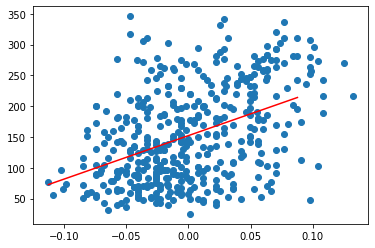

In [75]:
line_x = np.arange(min(x), max(x), 0.1)
line_y = W * line_x + b

plt.plot(line_x, line_y, 'r-')
plt.scatter(x, y)
plt.show()